In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


import os

RANDOM_STATE = 42

In [2]:
bot_df = pd.read_parquet('data/revised_bot_data.parquet')
human_df = pd.read_parquet('data/revised_user_data.parquet')

df = pd.concat([bot_df, human_df], ignore_index=True)

df.head()

,created_at,location,protected,verified,label,followers_count,following_count,tweet_count,listed_count,twt_1,...,description759,description760,description761,description762,description763,description764,description765,description766,description767,description768
0,0.935731,1973,0,0,1,2.909985e-06,0.000226,0.000794,0.000033,-0.082287,...,0.377144,0.041443,0.321076,-0.305235,0.435472,0.053329,-0.133024,-0.464983,0.579307,0.786032
1,0.995158,3470,0,0,1,6.613603e-08,0.000123,0.000016,0.000000,-0.257648,...,0.286456,0.003284,0.136222,-0.386107,0.321125,-0.247822,0.097500,-0.220485,0.777367,0.106040
2,0.899943,3470,0,0,1,1.375629e-05,0.000676,0.000013,0.000099,-0.014701,...,-0.071037,-0.166699,0.034139,-0.105345,0.406227,0.049027,-0.316269,-0.169635,0.175440,0.541264
3,0.352279,3470,0,0,1,4.444341e-05,0.001236,0.001276,0.000033,0.021053,...,-0.209028,-0.428089,-0.021869,0.221049,0.429970,0.053499,-0.324410,-0.037174,0.356606,0.254426
4,0.977726,784,0,0,1,2.976121e-07,0.000022,0.000020,0.000000,-0.129479,...,0.043228,-0.243765,0.279862,0.323460,0.571173,-0.122655,-0.243921,-0.207299,0.000822,0.346163


In [3]:
# Get our data X and y before splitting into train and test sets
# We drop the text columns for now to see if the model even needs them for successful training.
y = df['label']

X = df.drop(columns='label')

print(X.head())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_STATE)

   created_at  location  protected  verified  followers_count  \
0    0.935731      1973          0         0     2.909985e-06   
1    0.995158      3470          0         0     6.613603e-08   
2    0.899943      3470          0         0     1.375629e-05   
3    0.352279      3470          0         0     4.444341e-05   
4    0.977726       784          0         0     2.976121e-07   

   following_count  tweet_count  listed_count     twt_1     twt_2  ...  \
0         0.000226     0.000794      0.000033 -0.082287 -0.043615  ...   
1         0.000123     0.000016      0.000000 -0.257648  0.019856  ...   
2         0.000676     0.000013      0.000099 -0.014701  0.086994  ...   
3         0.001236     0.001276      0.000033  0.021053 -0.028395  ...   
4         0.000022     0.000020      0.000000 -0.129479 -0.268331  ...   

   description759  description760  description761  description762  \
0        0.377144        0.041443        0.321076       -0.305235   
1        0.286456        0

In [4]:
# Check for potential class imbalance, may need to adjust loss function weights
print(len(df[df['label'] == 1]))
print(len(df[df["label"] == 0]))

5000
5000


In [5]:
# Training
'''model = svm.SVC(kernel='linear', random_state=RANDOM_STATE)
model.fit(X_train, y_train)'''

from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=1000000, verbose=1)
model.fit(X_train, y_train)


[LibLinear]iter  1 act 5.481e+01 pre 5.481e+01 delta 3.146e-05 f 8.000e+03 |g| 3.485e+06 CG   1
cg reaches trust region boundary
iter  2 act 1.661e+00 pre 1.661e+00 delta 1.258e-04 f 7.945e+03 |g| 5.325e+04 CG   1
cg reaches trust region boundary
iter  3 act 6.682e+00 pre 6.682e+00 delta 5.033e-04 f 7.944e+03 |g| 7.470e+04 CG   2
cg reaches trust region boundary
iter  4 act 2.651e+01 pre 2.651e+01 delta 2.013e-03 f 7.937e+03 |g| 7.553e+04 CG   2
cg reaches trust region boundary
iter  5 act 1.025e+02 pre 1.025e+02 delta 8.053e-03 f 7.910e+03 |g| 7.346e+04 CG   2
cg reaches trust region boundary
iter  6 act 3.541e+02 pre 3.541e+02 delta 3.221e-02 f 7.808e+03 |g| 7.052e+04 CG   2
cg reaches trust region boundary
iter  7 act 6.415e+02 pre 6.415e+02 delta 3.330e-02 f 7.454e+03 |g| 5.415e+04 CG   3
cg reaches trust region boundary
iter  8 act 2.576e+02 pre 2.576e+02 delta 3.503e-02 f 6.812e+03 |g| 1.666e+04 CG   3
cg reaches trust region boundary
iter  9 act 1.162e+02 pre 1.162e+02 delta 3.9

LinearSVC(max_iter=1000000, verbose=1)

Accuracy: 0.69
F1 Score: 0.70
Precision: 0.69
Recall: 0.71


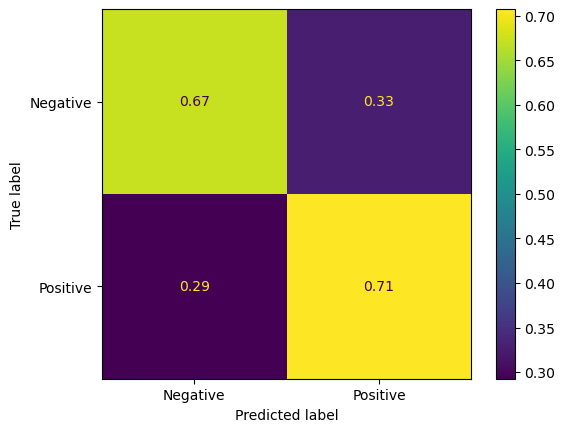

In [6]:
# Evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_hat = model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()


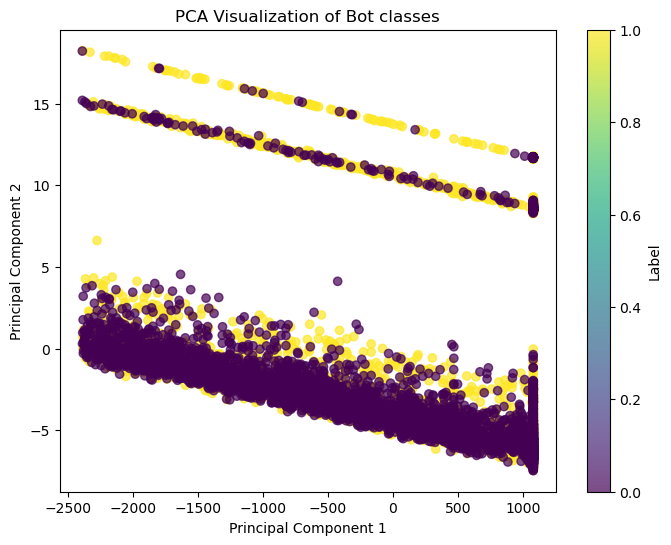

In [7]:
# Inspiration: https://www.datacamp.com/tutorial/introduction-t-sne
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# PCA reduces feature space by finding directions that capture the most variance
pca = PCA(n_components=3, random_state=RANDOM_STATE)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("PCA Visualization of Bot classes")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Label')
plt.show()

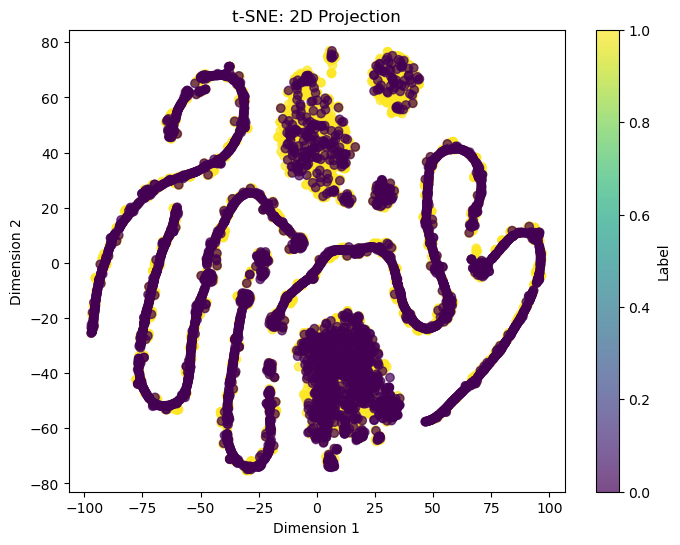

In [8]:
# Interesting, but doesn't preserve local structure very well, let's look at t-SNE
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=2, random_state=RANDOM_STATE).fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.title("t-SNE: 2D Projection")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label='Label')
plt.show()

In [9]:
# We'll try with a Random Forest now
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.75
F1 Score: 0.74
Precision: 0.78
Recall: 0.70


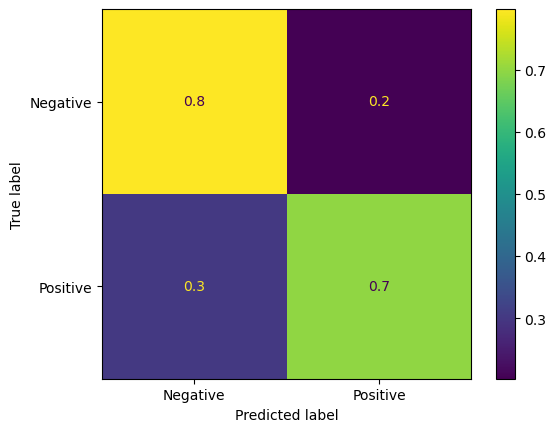

In [10]:
y_hat = rf_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()

Accuracy: 0.66
F1 Score: 0.67
Precision: 0.67
Recall: 0.67


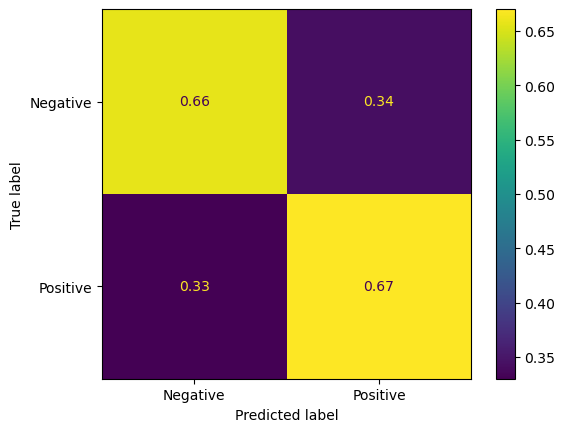

In [11]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree.fit(X_train, y_train)

y_hat = tree.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()

Accuracy: 0.68
F1 Score: 0.61
Precision: 0.80
Recall: 0.49


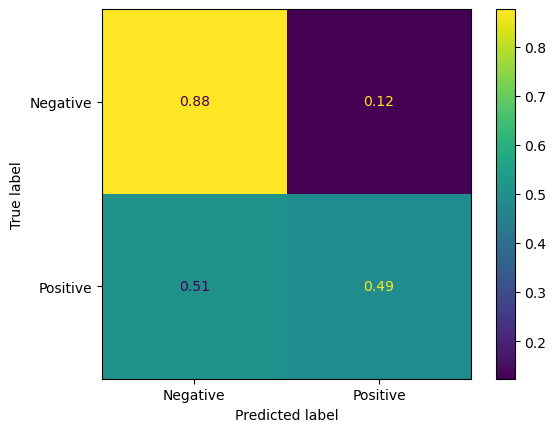

In [12]:
# Naive-Bayes (with text)
from sklearn.naive_bayes import GaussianNB

bayes_model = GaussianNB()
bayes_model.fit(X_train, y_train)

y_hat = bayes_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()

Accuracy: 0.66
F1 Score: 0.65
Precision: 0.68
Recall: 0.63


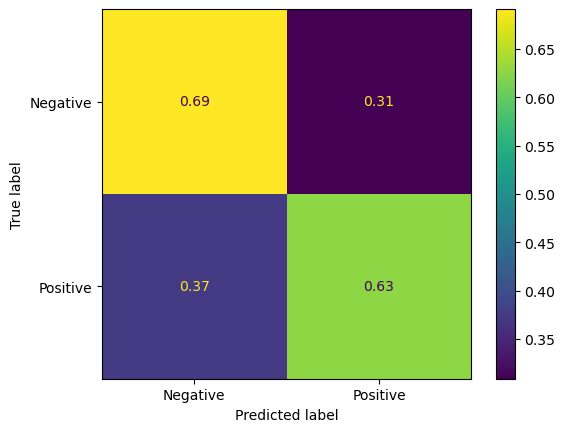

In [13]:
# k-Nearest Neighbors (without text)
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_hat = knn.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_hat)
f1 = f1_score(y_test, y_hat, average='binary')  # use average='macro' or 'weighted' for multiclass
precision = precision_score(y_test, y_hat, average='binary')
recall = recall_score(y_test, y_hat, average='binary')

print("Accuracy: {:.2f}".format(accuracy))
print("F1 Score: {:.2f}".format(f1))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))

cm_test = confusion_matrix(y_test, y_hat, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=['Negative', 'Positive']).plot()
plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report


import os

RANDOM_STATE = 42

In [2]:
# Deep Learning Model
# inspired by: https://machinelearningmastery.com/pytorch-tutorial-develop-deep-learning-models/
from deep_learning.dataloader import Bot_Dataset
from deep_learning.nn_model import DNN, SimpleMLP
from torch.utils.data import random_split, DataLoader

In [7]:
from torch.optim import Adam
import torch.nn
from torch.optim.lr_scheduler import ReduceLROnPlateau

dvc = 'cuda' if torch.cuda.is_available() else 'cpu'

datapath = "/home/jdosch1/personal/COSC325_Final/data"

dataset = Bot_Dataset(datapath)


# Create DataLoaders after splitting dataset into train and test
length = len(dataset)
train_len = int(0.8 * length)
test_len = int(0.2 * length)

train_dataset, test_dataset = random_split(dataset, [train_len, test_len], torch.Generator().manual_seed(42))

train_dl = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dl = DataLoader(test_dataset, batch_size=32, shuffle=False)

num_scalar_features = dataset.scalar[0].shape[0]
model = DNN(num_scalar_features=num_scalar_features).to(dvc)
# model = SimpleMLP(length=next(iter(train_dl))[0].shape[2]).to(dvc)

# All hyperparameters taken directly from the paper this was inspired by
criterion = torch.nn.CrossEntropyLoss()
optimizer = Adam(model.parameters(), lr=1e-3, weight_decay=1e-4)

scheduler = ReduceLROnPlateau(
    optimizer,
    mode='min',
    factor=0.5,
    patience=10,
    eps=1e-4
)

class EarlyStopping:
    def __init__(self, patience=20, mode='max'):
        self.patience = patience
        self.mode = mode
        self.best = None
        self.bad_epochs = 0

    def step(self, current):
        improve = (self.best is None) or (current > self.best if self.mode == 'max' else current < self.best)

        if improve:
            self.best = current
            self.bad_epochs = 0
            return False # do not stop yet
        else:
            self.bad_epochs += 1
            return self.bad_epochs >= self.patience

early_stopper = EarlyStopping(patience=20, mode='min')


# Training loop
best_loss = np.inf
train_losses = []
val_losses = []

for epoch in range(1, 201):
    model.train()

    train_loss_total = 0.0
    train_acc = 0.0
    total_samples = 0

    for inputs, scalars, targets in train_dl: 
        # Cast inputs and targets to prevent typing conflicts with model
        inputs = inputs.float().to(dvc)
        scalars = scalars.float().to(dvc)
        targets = targets.long().to(dvc) # needs to be of type long for loss function
        # Clear current gradient (accumulates otherwise)
        optimizer.zero_grad()
        yhat = model(inputs, scalars)

        # Calculate loss and backpropagate
        loss = criterion(yhat, targets)
        loss.backward()

        # Clip gradients to prevent them from exploding to infinity
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        
        # Update model weights
        optimizer.step()

        train_loss_total += loss.item()
        train_acc += (yhat.argmax(dim=1) == targets).sum().item()
        total_samples += targets.size(0)

    avg_train_loss = train_loss_total / len(train_dl)
    train_losses.append(avg_train_loss)

    train_acc /= total_samples

    # Evaluate model performance
    val_loss_total = 0.0
    val_acc = 0.0
    total_samples = 0

    model.eval()
    for inputs, scalars, targets in test_dl:
        inputs = inputs.float().to(dvc)
        scalars = scalars.float().to(dvc)
        targets = targets.long().to(dvc)
        
        yhat = model(inputs, scalars)
        val_loss = criterion(yhat, targets)
        val_loss_total += val_loss.item()
        val_acc += (yhat.argmax(dim=1) == targets).sum().item()
        total_samples += targets.size(0)
    
    avg_val_loss = val_loss_total / len(test_dl)
    val_losses.append(avg_val_loss)
    
    val_acc /= total_samples

    if epoch % 5 == 0:
        print(f"Logging... epoch: {epoch}, train_loss: {avg_train_loss}, val_loss: {avg_val_loss}, train_acc: {train_acc}, val_acc: {val_acc}")
    
    '''scheduler.step(avg_val_loss)
    
    if avg_val_loss < best_loss:
        best_loss = avg_val_loss
        torch.save(model.state_dict(), "best_model.pt")
        print(f"New best model saved at epoch: {epoch}.")

    if early_stopper.step(avg_val_loss):
        print(f"Early stop at epoch: {epoch}. No improvement detected.")
        torch.save(model.state_dict(), "early_stop.pt")
        break
    '''

Logging... epoch: 5, train_loss: 0.7003044416904449, val_loss: 0.9039306328410194, train_acc: 0.63125, val_acc: 0.537
Logging... epoch: 10, train_loss: 0.699540563941002, val_loss: 0.6003604829311371, train_acc: 0.637125, val_acc: 0.679
Logging... epoch: 15, train_loss: 0.6959808738231659, val_loss: 0.6952232983377244, train_acc: 0.644, val_acc: 0.62
Logging... epoch: 20, train_loss: 0.7101731964349747, val_loss: 0.6602553980691093, train_acc: 0.636, val_acc: 0.657
Logging... epoch: 25, train_loss: 0.6701284765005112, val_loss: 0.5769830748202309, train_acc: 0.637125, val_acc: 0.7025
Logging... epoch: 30, train_loss: 0.7419250801801681, val_loss: 0.6176833193453531, train_acc: 0.631625, val_acc: 0.665
Logging... epoch: 35, train_loss: 0.6944102283716201, val_loss: 0.6324489391039289, train_acc: 0.649, val_acc: 0.6785
Logging... epoch: 40, train_loss: 0.7460659921169281, val_loss: 0.6486863437153044, train_acc: 0.6355, val_acc: 0.642
Logging... epoch: 45, train_loss: 0.7531717739105225,

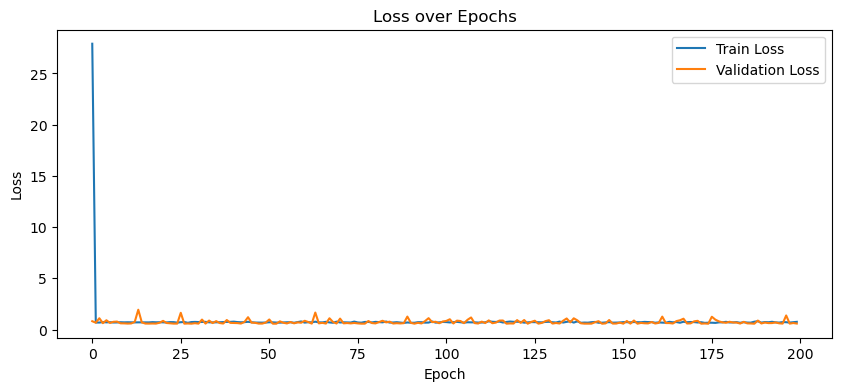

In [9]:
import matplotlib.pyplot as plt

# Loss Curve
plt.figure(figsize=(10, 4))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()